# Сборный проект - 1
## Факторы успешности компьютерных игр

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Задача исследования:**

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Информация о таблице:**

В таблице представлены данные до 2016 года. Данные за 2016 год могут быть неполными. Столбцы таблицы:
 
    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение общей информации

Импотрируем все необходимые для будущей работы библиотеки и датасет с данными.

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Получим первичную информацию по таблице.

In [3]:
if os.path.exists('games.csv'):
    data = pd.read_csv('games.csv')
else:
    data = pd.read_csv('/datasets/games.csv')

print(data.columns)
display(data.sample(10))
print(data.info(memory_usage = 'deep'))

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9146,The Granstream Saga,PS,1997.0,Role-Playing,0.08,0.05,0.00,0.01,NaN,NaN,NaN
14814,Kaizoku Sentai Gokaiger: Atsumete Henshin! 35 ...,DS,2011.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
8993,CSI: 3 Dimensions of Murder,PS2,2007.0,Adventure,0.07,0.06,0.00,0.02,NaN,tbd,M
10692,Harvey Birdman: Attorney at Law,PSP,2008.0,Adventure,0.09,0.00,0.00,0.01,62.0,8,T
15270,Let's Play Flight Attendant,DS,2010.0,Simulation,0.02,0.00,0.00,0.00,NaN,tbd,E
9863,Overlord: Raising Hell,PS3,2008.0,Action,0.07,0.03,0.00,0.02,72.0,7.7,T
15704,Writing and Speaking Beautiful Japanese DS,DS,NaN,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
7914,DanceDanceRevolution,PS3,2010.0,Simulation,0.12,0.05,0.00,0.02,60.0,tbd,E10+
15075,Colin McRae Rally 2.0,GBA,2002.0,Racing,0.02,0.01,0.00,0.00,80.0,tbd,E
5585,Harvest Moon: Back to Nature,PS,1999.0,Simulation,0.11,0.07,0.12,0.02,82.0,9.3,E


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 5.6 MB
None


### Выводы

1. В таблице представлены данные следующих типов: float64(6), object(5). При этом они недостаточно хорошо оптимизированы и требуют дальнейшего изменения:
- `Year_of_Release` (float64) - необходимо изменить на datetime
- `User_Score` (object) - необходимо изменить на float

2. Есть пропущенные значения в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`: 
- В столбцах `Name` и `Genre` у нас всего 2 пропущенных значения из 16715, предлагаю просто удалить эти строки.
- В столбцах `Critic_Score`, `User_Score` предлагаю оставить пропущенные значения, т.к. это субъективный критерий и мы не сможем установить объективную корреляцию с другими столбцами, заполнение по медиане даст искажения.
- `Year_of_Release` - необходимо посчитать процент пропущенных значений и, если он критически мал - удалить их.
- В столбце `User_Score` есть значения tbd. Аббревиатура означает to be determined (нуждается в уточнении). Необходимо понять, сколько таких значений, и как их обработать, чтобы мы могли поменять тип значений в столбцах.

3. В столбцах `NA_sales`, `EU_sales`, `JP_sales` и `Other_sales` - есть нулевые значения, т.к. значения исчисляются в миллионах. Эти значения отрабатывать не будем. Когда будем считать общую выручку, возможно, они исчезнут.

4. Названия столбцов используют разный регистр - необходимо привести к нижнему.

## Подготовка данных

### Форматирование таблицы

Приведём все заголовки таблицы к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Пропущенные значения

Удалим пропущенные значения в столбцах `Name` и `Genre`.

In [5]:
data.dropna(subset = ['name', 'genre'], inplace=True)
data.reset_index(drop=True, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посчитаем количество значений tbd в столбце `user_score`.

In [6]:
print('Количество значений с аббревиатурой tbd:', data.query('user_score == "tbd"').shape)

Количество значений с аббревиатурой tbd: (2424, 11)


Количество значений tbd является довольно существенным, и его нельзя просто выбросить. Заменим значения на NaN, чтобы в дальнейшем иметь доступ к остальным значениям строк.

In [7]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

print('Количество значений с аббревиатурой tbd:', data.query('user_score == "tbd"').shape)
print()
data.info()

Количество значений с аббревиатурой tbd: (0, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посчитаем количество пропущенных значений в столбце `year_of_release`.

In [8]:
print(f"% пропущенных значений year_of_release: {data['year_of_release'].isna().sum() / data['year_of_release'].count(): .1%}")

% пропущенных значений year_of_release:  1.6%


Видим, что таких значений - 1.6%, поэтому мы можем их удалить.

In [9]:
data.dropna(subset=['year_of_release'], inplace=True)
data.reset_index(drop=True, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Формат значений

После всех проведённых манипуляций с данными, заменим формат значений на оптимальный

In [10]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format="%Y")
data['year_of_release'] = pd.DatetimeIndex(data['year_of_release']).year
data['user_score'] = data['user_score'].astype('float')

### Считаем общую выручку

Добавим новый столбец в датафрейм с суммарной выручкой по регионам. Проверим корректность проведённых расчётов.

In [11]:
data['total_income'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [12]:
display(data.head())
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
total_income       16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Анализ и описание данных

### Распределение игр по годам

Для начала просмотрим за какие года есть данные об играх, а затем построим график, отражающий динамику выпускавшихся игр. Для подсчёта количества возьём названия игр.

In [13]:
data['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

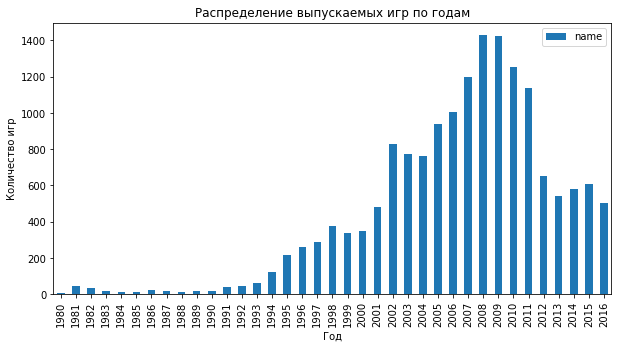

In [14]:
data.groupby('year_of_release').agg({'name': 'count'}).plot(kind='bar', figsize=(10,5), 
                                                            title='Распределение выпускаемых игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Видим, что с 1990 года начал наблюдаться плавный рост выпускаемых игр, с пиком в 2008 и 2009 годах. После этого количество выпускаемых игр стало спадать и с 2012 вышло в плато. Данные до 1990 мы можем не учитывать, как не представляющие интереса. Также, вероятно, что для дальнейшего анализа наиболее существенными будут года 2012-2016, т.к. у них одинаковая динамика.

### Распределение продаж по платформам

Проанализируем, как менялись продажи по платформам. Для этого посмотрим, какие вообще платформы были. Воспользуемся сводной таблицей.

In [15]:
top_platforms = data.groupby('platform').agg({'total_income': 'sum'})
top_platforms.sort_values(by='total_income', ascending=False)

,total_income
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Отберём топ-10 платформ по продажам

In [16]:
top_platforms = top_platforms.sort_values(by='total_income', ascending=False).head(10)
top_platforms = top_platforms.index

Построим таблицу, на которой отметим топ-10 платформы и их суммарные продажи по годам.

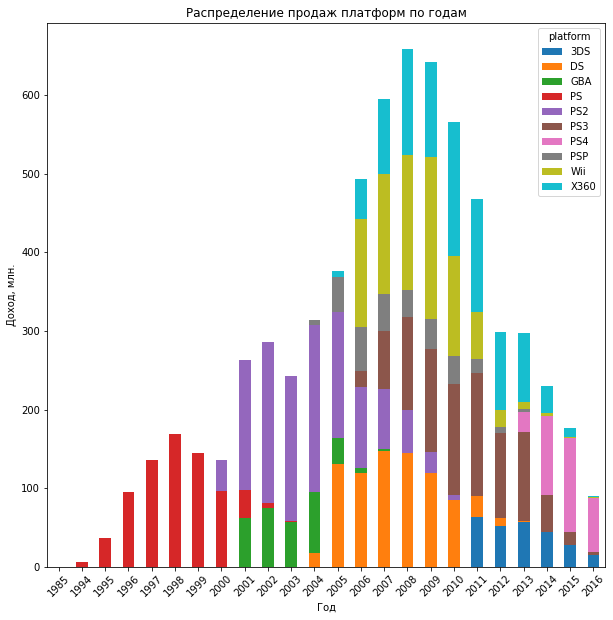

In [17]:
data.query('platform in @top_platforms').pivot_table(index='year_of_release', columns = 'platform',\
                                         values='total_income', aggfunc='sum').plot(kind='bar', figsize=(10, 10), \
                                         rot=45, title='Распределение продаж платформ по годам', stacked=True)
plt.xlabel('Год')
plt.ylabel('Доход, млн.')
plt.show()

Рассчитаем, какой средний срок жизни платформы на рынке. Для этого отфильтруем платформы по прибыли, минимальная - 10 млн: ориентируемся на первую таблицу по всем платформам, в которой у платформ меньше 10 млн прибыль не превышает 1-2 млн.

In [18]:
#минимальный порог продаж в млн.
min_sales = 10

#формируем таблицу, в которой платформы проходят минимальный порог продаж
report = data.groupby (['platform', 'year_of_release']).agg({'total_income': 'sum'}).query('total_income > @min_sales')

#находим среднее арифметическое по уникальным годам существования платформы на рынке
report.reset_index().groupby('platform').agg({'year_of_release': 'nunique'}).mean() 

year_of_release    6.086957
dtype: float64

Видим, что среднее время продолжительности жизни платформы - 6 лет. При этом, исходя из построенного графика мы видим, что пик роста популярности платформы приходится на 3-4 года, после чего, продажи начинают падать. 

Также, мы видим, что за последние 6 лет на рынке существует только 4 конкурента: PS3/4, X360, 3DS. Увеличение прибыли наблюдается только у PS4 (которая плавно сменила PS3). Продажи 3DS демонстрируют относительную стабильность. Остальные платформы показывают уменьшение прибыли.

### Диаграмма размаха дохода для площадок

Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам. За релевантные года будем использовать данные, начиная с 2011 года.

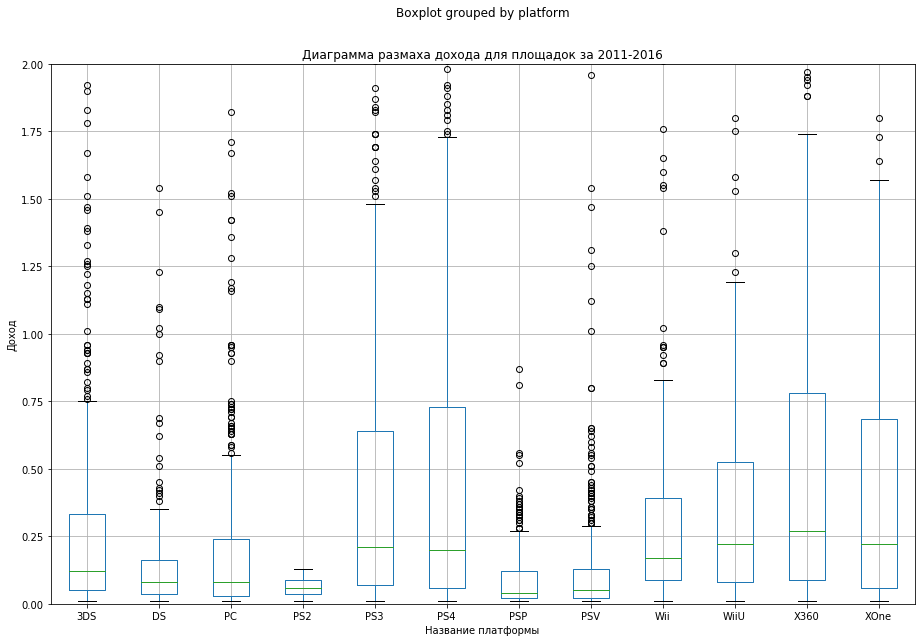

In [19]:
data_filtered = data.query('year_of_release >= 2011')

data_filtered.boxplot(column='total_income', by='platform', figsize=(15,10))
plt.xlabel('Название платформы')
plt.ylabel('Доход')
plt.title('Диаграмма размаха дохода для площадок за 2011-2016')
plt.ylim(0,2)
plt.show()

На диаграмме видно, что самые высокая медиана продаж была на платформе X360, затем - XOne, PS3 и PS4. Самый большой размах при этом у X360 и PS4. Видим, что Xbox и PS являются наиболее перспективными и стабильными платформами, т.к. новые версии органично сменяют старые. Самый низкий доход у PSP и PSV.

### Зависимость продаж от оценок

Постараемся выяснить, зависит ли доход от оценки критиков и пользователей. Для этого построим диаграммы рассеивания.

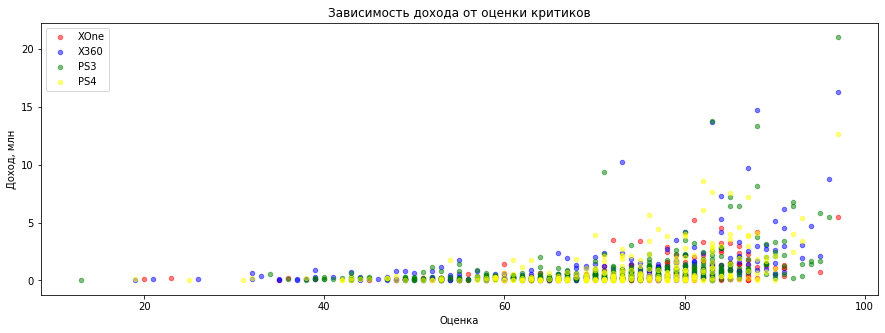

In [20]:
ax=data_filtered.query('platform == "XOne"').plot(kind='scatter', x='critic_score', y='total_income', color='red', 
                                    alpha=0.5, label='XOne', figsize=(15,5))
data_filtered.query('platform == "X360"').plot(kind='scatter', x='critic_score', y='total_income', color='blue', 
                                    alpha=0.5, label='X360', ax=ax)
data_filtered.query('platform == "PS3"').plot(kind='scatter', x='critic_score', y='total_income', color='green', 
                                    alpha=0.5, label='PS3', ax=ax)
data_filtered.query('platform == "PS4"').plot(kind='scatter', x='critic_score', y='total_income', color='yellow', 
                                    alpha=0.5, label='PS4', ax=ax)
plt.xlabel('Оценка')
plt.ylabel('Доход, млн')
plt.title('Зависимость дохода от оценки критиков')
plt.legend();

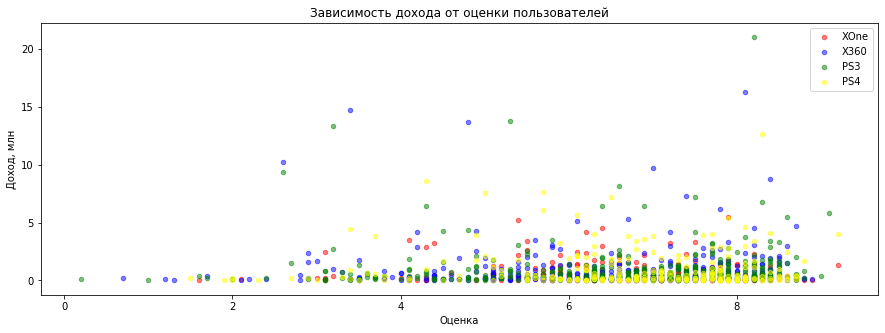

In [21]:
ax=data_filtered.query('platform == "XOne"').plot(kind='scatter', x='user_score', y='total_income', color='red', 
                                    alpha=0.5, label='XOne', figsize=(15,5))
data_filtered.query('platform == "X360"').plot(kind='scatter', x='user_score', y='total_income', color='blue', 
                                    alpha=0.5, label='X360', ax=ax)
data_filtered.query('platform == "PS3"').plot(kind='scatter', x='user_score', y='total_income', color='green', 
                                    alpha=0.5, label='PS3', ax=ax)
data_filtered.query('platform == "PS4"').plot(kind='scatter', x='user_score', y='total_income', color='yellow', 
                                    alpha=0.5, label='PS4', ax=ax)
plt.xlabel('Оценка')
plt.ylabel('Доход, млн')
plt.title('Зависимость дохода от оценки пользователей')
plt.legend();

Построем корреляцию Пирсона для самой популярной платформы X360.

In [22]:
data_filtered.query('platform == "X360"')[['user_score', 'critic_score', 'total_income']].corr()

,user_score,critic_score,total_income
user_score,1.000000,0.568386,0.038918
critic_score,0.568386,1.000000,0.391253
total_income,0.038918,0.391253,1.000000


И суммарно для оставшихся популярных платформ: XOne, PS3, PS4.

In [23]:
data_filtered[data_filtered['platform'].isin(['XOne', 'PS3', 'PS4'])][['user_score', 'critic_score', 'total_income']].corr()

,user_score,critic_score,total_income
user_score,1.000000,0.537415,-0.007849
critic_score,0.537415,1.000000,0.382063
total_income,-0.007849,0.382063,1.000000


На примере популярных платформ мы видим, что оценка пользователей на доход практически не влияет. Оценка критиков больше влияет на  доход, но корреляцию тоже нельзя назвать ярко выраженной. Эту гипотезу подтверждает корреляция Пирсона по X360 и оставшимся популярным платформам датасета (XOne, PS3, PS4).

### Зависимость дохода от жанра

Построим диаграммы размаха, чтобы посмотреть зависимость дохода от жанра.

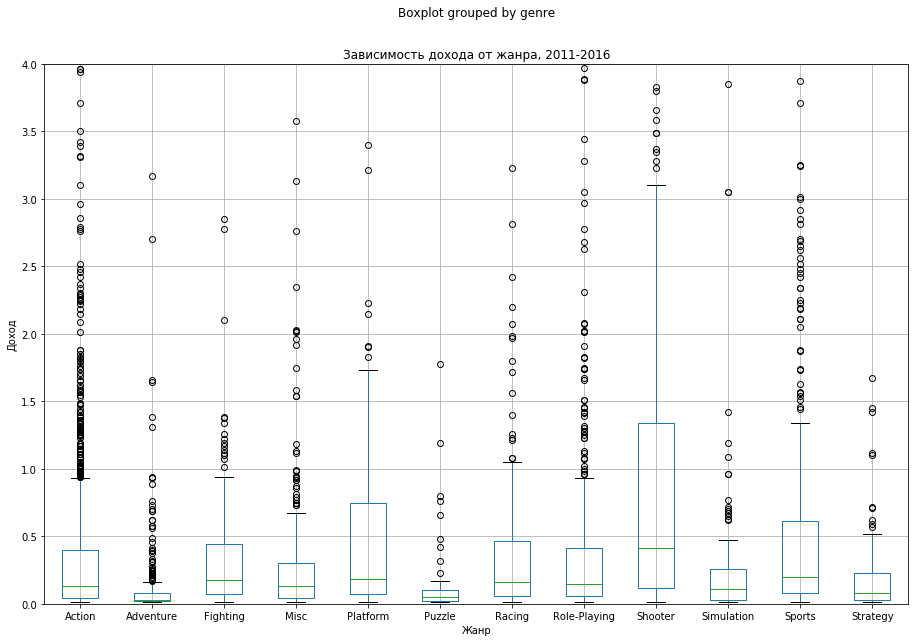

In [24]:
data_filtered.boxplot(column='total_income', by='genre', figsize=(15, 10))
plt.title('Зависимость дохода от жанра, 2011-2016')
plt.ylim(0, 4)
plt.xlabel('Жанр')
plt.ylabel('Доход')
plt.show()

Видим, что у нас самая высокая медиана дохода у жанра shooter. У него же самый большой размах в значениях, поэтому он является наиболее перспективным. Затем идут sport и platform (размах у platform чуть больше). Самые низкие продажи у жанра adventure и puzzle. 

### Выводы

Видим, что с 1990 года начал наблюдаться плавный рост выпускаемых игр, с пиком в 2008 и 2009 годах. После этого количество выпускаемых игр стало спадать и с 2012 вышло в плато. 

Cреднее время продолжительности жизни платформы на рынке - 6 лет. Поэтому для анализа мы взяли последние 6 лет, а именно 2011-2016. При этом пик роста популярности платформы происходит 3-4 года, после чего, продажи начинают падать.  

Также, мы видим, что за последние 6 лет на рынке существует только 3 значимых конкурента: PS, X360, DS. Увеличение прибыли наблюдается только у PS4 (которая плавно сменила PS3). Продажи 3DS демонстрируют относительную стабильность. Остальные платформы показывают уменьшение прибыли.

Мы выяснили, что самая высокая медиана продаж была на платформе X360, затем - XOne, PS3 и PS4. Самый большой размах при этом у X360 и PS4. Из этого можно сделать вывод, что Xbox и PS являются наиболее перспективными и стабильными платформами, т.к. новые версии органично сменяют старые. Самый низкий доход у PSP и PSV.

На примере популярных платформ мы выяснили, что оценка пользователей на доход практически не влияет. Оценка критиков больше влияет на  доход, но корреляцию тоже нельзя назвать ярко выраженной. 

Самая высокая медиана дохода у жанра shooter. У него же самый большой размах в значениях, поэтому он является наиболее перспективным. Затем идут sport и platform (размах у platform чуть больше). Самые низкие продажи у жанра adventure и puzzle. 

## Портрет пользователя каждого региона

Для того, чтобы понять, чем увлекаются пользователи в том или ином регионе, какой продукт может подойти, проанализируем зависимость продаж и следующих критериев:
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5). 
- Ррейтинг ESRB.

В качестве анализируемых регионом возьмём США (Северная Америка), Европу и Японию.

### Самые популярные платформы (топ-5)

Построим график по сводной таблице с группировкой по продажам, чтобы лучше визуализировать данные.

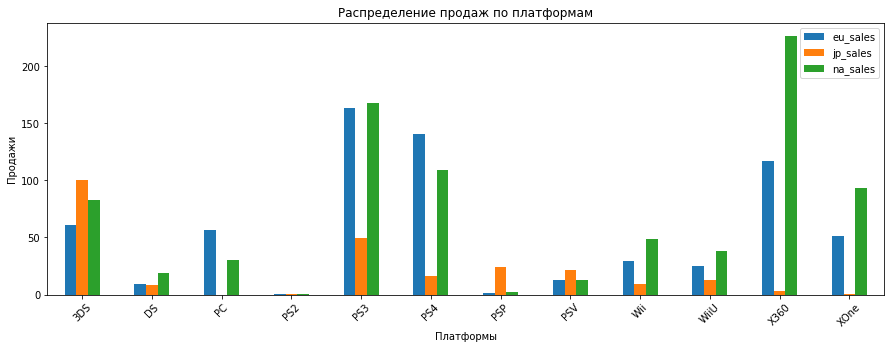

In [25]:
data_filtered.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], 
                          aggfunc='sum').plot(kind='bar',figsize=(15,5), rot=45,
                                              title='Распределение продаж по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

Выберем топ-5 платформ для каждого региона и посчитаем суммарные продажы по каждой из них.

In [26]:
for var in ['na_sales', 'eu_sales', 'jp_sales']:
    region_data = data_filtered.pivot_table(index='platform', values=var, aggfunc='sum').\
    sort_values(by=var, ascending=False).head()
    region_data['ratio'] = (region_data[var] / region_data[var].sum()).round(2)
    display(region_data)


,na_sales,ratio
platform,,
X360,226.80,0.33
PS3,168.26,0.25
PS4,108.74,0.16
XOne,93.12,0.14
3DS,82.65,0.12


,eu_sales,ratio
platform,,
PS3,163.10,0.30
PS4,141.09,0.26
X360,117.10,0.22
3DS,61.27,0.11
PC,56.70,0.11


,jp_sales,ratio
platform,,
3DS,100.62,0.47
PS3,49.39,0.23
PSP,24.04,0.11
PSV,21.84,0.10
PS4,15.96,0.08


Мы видим, что в США лидируют продажи X360 (33% от продаж), затем идут продажи PS3 (26%). Остальные, менее существенные игроки: PS4 (16%), XOne (14%) и 3DS (12%).

В Европе похожая ситуация, с той разницей, что на первом месте находится PS3 (30% от продаж). Второе и третье почти поровну принадлежит PS4 (26%) и X360 (22%). Менеьшая доля у 3DS (11%) и PC (11%).

Если смотреть на Японию, то ситуация значительно отличается. 3DS занимает лидирующее первое место и получает 47% от всех продаж. Затем, идёт PS3 (23%). Менее существенные игроки: PSP (11%), PSV (10%), PS4(8%). Xbox среди лидеров на Японском рынке не представлен.

### Самые популярные жанры (топ-5)

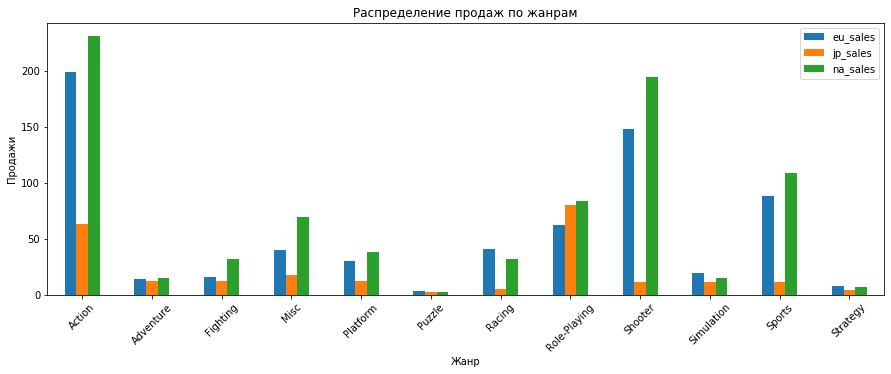

In [27]:
data_filtered.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], 
                          aggfunc='sum').plot(kind='bar',figsize=(15,5), rot=45,
                          title='Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

In [28]:
for var in ['na_sales', 'eu_sales', 'jp_sales']:
    display(data_filtered.pivot_table(index='genre', values=var, aggfunc='sum').\
            sort_values(by=var, ascending=False).head())

,na_sales
genre,
Action,230.92
Shooter,194.43
Sports,108.70
Role-Playing,83.78
Misc,69.69


,eu_sales
genre,
Action,199.12
Shooter,148.02
Sports,88.48
Role-Playing,62.30
Racing,40.58


,jp_sales
genre,
Role-Playing,79.87
Action,63.62
Misc,17.60
Fighting,12.38
Platform,12.13


Популярные жанры в США и Европе  практически не отличаются. Первые 4 места одинаковые: 
- Action 
- Shooter 
- Sports 
- Role-Playing 	

Пятое место разделили Misc (вероятно, miscellaneous) и Racing.

В Японии на первом месте находится Role-Playing, на втором - Action. Третье место отдано - Misc. На четвертом и пятом - Fighting и Platform (соответственно)


### Влияние рейтинга ESRB на продажи

Для начала опишем значения представленных в таблице рейтингов:

- EC (Early childhood) — Для детей младшего возраста
- E (Everyone) — Для всех
- E10+ (Everyone 10 and older) — Для всех от 10 лет и старше
- T (Teen) — Подросткам
- M (Mature) — Для взрослых
- AO (Adults Only 18+) — Только для взрослых
- RP (Rating Pending) — Рейтинг ожидается

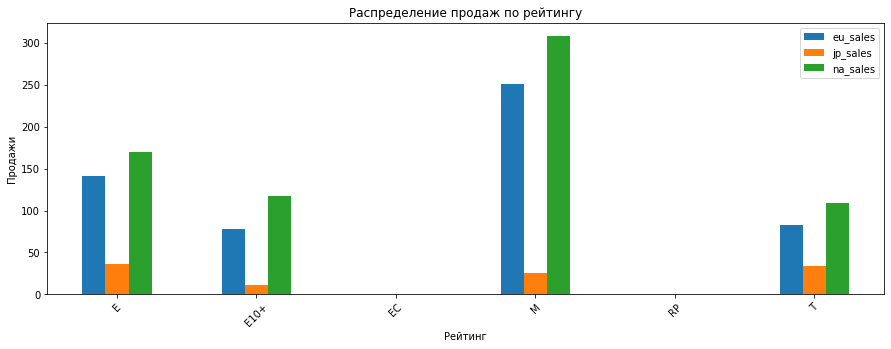

In [29]:
data_filtered.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], 
                          aggfunc='sum').plot(kind='bar',figsize=(15,5), rot=45,
                          title='Распределение продаж по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

In [30]:
for var in ['na_sales', 'eu_sales', 'jp_sales']:
    display(data_filtered.pivot_table(index='rating', values=var, aggfunc='sum').\
            sort_values(by=var, ascending=False).head())

,na_sales
rating,
M,308.45
E,170.17
E10+,117.72
T,109.31
EC,0.42


,eu_sales
rating,
M,250.26
E,141.73
T,83.16
E10+,78.00
RP,0.03


,jp_sales
rating,
E,36.68
T,33.39
M,26.14
E10+,11.23
EC,0.00


Снова наблюдаем, что в США и Европе у нас наблюдается похожая ситуация. Первое и второе места занимают Mature и Everyone соответственно. Затем идут расхождения. В США 3 место - Everyone 10+, а затем Teen. В Европе - наоборот.

В Японии рейтинг расположился иначе:
- Everyone
- Teen
- Mature
- Everyone 10+

### Выводы

Проанализировав зависимость дохода от платформы, жанра и рейтинга ESRB мы можем сформировать следующий портрет пользователя по регионам. Значения расположены по убыванию прибыли.

**США**

||Платформы|Жанры|Рейтинг| 
|:---|:--- |:--- |:---|
|1|X360 (33% прибыли)|Action|M - Mature|
|2|PS3 (25%) | Shooter|E - Everyone| 
|3||Sports|E10+ - Everyone 10+|
|4||Role-Playing|T - Teen|



**Европа**

||Платформы|Жанры|Рейтинг| 
|:--| :-------------------- | :-------------------- | :-------------------- |
|1|PS3 (30%)|Action|M - Mature|
|2|PS4 (26%) | Shooter|E - Everyone| 
|3|X360 (22%)|Sports|E10+ - Everyone 10+|
|4||Role-Playing|T - Teen|
|5||Racing||



**Япония**

||Платформы|Жанры|Рейтинг| 
|:---|:--- |:--- |:---|
|1|3DS (47%)|Role-Playing|E - Everyone|
|2|PS3 (23%)|Action|T - Teen| 
|3||Fighting|M - Mature|
|4||Platform|E10+ - Everyone 10+|

Видим, что США и Европа довольно похожи по характеристике целевой аудитории. Основное отличие - в платформах, которые они используют. В США больше перспективен Xbox, а в Европе - PS. В Япони портрет пользователя координально отличается.

## Проверка гипотез и пояснения

До начала стат-тестов нам необходимо отработать пропущенные значения, которые встречались в столбце `user_score`, иначе у нас не получится проверить гипотезу. Т.к. мы не сможем заменить эти значения никакими другими (без искажения данных), то просто удалим пропущенные значения.

In [31]:
data_filtered.dropna(subset=['user_score'], inplace=True)
data_filtered.reset_index(drop=True, inplace=True)

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выведем основную и альтернативную гипотезы, чтобы проверить, отличаются средние пользовательские рейтинги Xbox One и PC или нет.

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги платформ Xbox One и PC одинаковые}\\
   H_1 :\text{Средние пользовательские рейтинги платформ Xbox One и PC отличаются}
 \end{cases}
\end{equation*}$

Уровень статистической значимости: $\alpha = 0.05$

Посчитаем p-value, используя ttest для сравнения средних двух выборок (Xbox One и PC), которые друг от друга не зависят, дисперсия не равна. 

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [32]:
data_xone = data_filtered.query('platform == "XOne"')
data_pc = data_filtered.query('platform == "PC"')

alpha = .05

results = st.ttest_ind(data_xone['user_score'], data_pc['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.6130712247638477
Не удалось отвергнуть нулевую гипотезу


#### Выводы

p-value получилось больше выбранного уровня $\alpha = 0.05$. 

Не получилось отвергнуть нулевую гипотезу. Вывод: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports разные

Выведем основную и альтернативную гипотезы, чтобы проверить, отличаются средние пользовательские рейтинги для жанров Action и Sports или нет.

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанров Action и Sports разные}\\
   H_1 :\text{Средние пользовательские рейтинги платформ Xbox One и PC одинаковые}
 \end{cases}
\end{equation*}$

Уровень статистической значимости: $\alpha = 0.05$

Посчитаем p-value, используя ttest для сравнения средних двух выборок (Action и Sports), которые друг от друга не зависят, дисперсия не равна. 

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [33]:
data_action = data_filtered.query('genre == "Action"')
data_sports = data_filtered.query('genre == "Sports"')

alpha = .05

results = st.ttest_ind(data_action['user_score'], data_sports['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 8.285648549432565e-19
Отвергаем нулевую гипотезу


#### Выводы

p-value получилось меньше выбранного уровня $\alpha = 0.05$. 

Отвергаем нулевую гипотезу. Вывод: средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Общий вывод

В рамках проведённого исследования мы изучили данные. Изменили формат значений в таблице, заполнили пропущенные значения и изменили их формат для удобства работы.

Проанализировали распределение платформ по годам и посчитали общую прибыль, а также топ-5 платформ, жарнов и рейтингов для США (Северная Америка), Европы и Японии, чтобы определить портрет целевой аудитории.

Также проверили 2 гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (не удалось отвергнуть).
2. Средние пользовательские рейтинги жанров Action и Sports разные (отвергнута).

**Исходя из проведённых исследований мы можем сделать следующие выводы:**

Cреднее время продолжительности жизни платформы на рынке - 6 лет. При этом пик роста популярности платформы происходит 3-4 года, после чего, продажи начинают падать.  

Также, мы видим, что за последние 6 лет на рынке существует только 3 конкурента: PS, Xbox, DS. Увеличение прибыли наблюдается только у PS4 (которая плавно сменила PS3). Продажи 3DS демонстрируют относительную стабильность. Остальные платформы показывают уменьшение прибыли. 

Мы выяснили, что самая высокая медиана продаж была на платформе X360, затем - XOne, PS3 и PS4. Самый большой размах при этом у X360 и PS4. Из этого можно сделать вывод, что Xbox и PS являются наиболее перспективными и стабильными платформами, т.к. новые версии органично сменяют старые.

На примере популярных платформ мы выяснили, что оценка пользователей на доход практически не влияет. Оценка критиков больше влияет на  доход, но корреляцию тоже нельзя назвать ярко выраженной. 

Самая высокая медиана дохода у жанра shooter. У него же самый большой размах в значениях, поэтому он является наиболее перспективным. Затем идут sport и platform (размах у platform чуть больше). Самые низкие продажи у жанра adventure и puzzle. 

**Портрет целевой аудитории**

Проанализировав зависимость дохода от платформы, жанра и рейтинга ESRB мы можем сформировать следующий портрет потенциально популярного продукта по регионам:

|Страна|Платформа|Жанр|Рейтинг| 
|:---|:--- |:--- |:---|
|США|X360|Action|M - Mature|
|Европа|PS3 (30%)|Action|M - Mature| 
|Япония|3DS (47%)|Role-Playing|E - Everyone|

Видим, что США и Европа довольно похожи по характеристике целевой аудитории. Основное отличие - в платформах, которые они используют. В США более перспективныой является Xbox, в Европе - PS, ав Японии - DS. В Япони портрет пользователя координально отличается от западного и европейского.

Из этого можно сделать вывод, что для США и Европы мы можем делать похожие игровые продукты и адаптировать их под Xbox/PS. Для Японии нужно запускать нишевые продукты, исходя из тех наиболее популярных значений, которые удалось выяснить.